In [1]:
import torch
from torch.utils.data import DataLoader, random_split

import torch_geometric as pyg
import torch.nn as nn

from torch_geometric.data import Data
from torch_geometric.data import InMemoryDataset

import os
import sys
import numpy as np
import pandas as pd
import networkx as nx

In [2]:
torch.randint(0,100,(200,2)).shape

torch.Size([200, 2])

In [3]:
from torch_geometric.data import Data
import torch_geometric.transforms as T

actors_net = Data(
    x = torch.rand(5,1),
    edge_index = torch.randint(0,5,(2,4))
)

# actors_net = T.AddSelfLoops()(actors_net)
actors_net = T.ToUndirected()(actors_net)

In [4]:
actors_net

Data(x=[5, 1], edge_index=[2, 5])

In [5]:
from torch_geometric.nn import GATConv, Linear, to_hetero
sample_conv = GATConv((-1, -1), 1, add_self_loops=False)

In [6]:
actors_net.x

tensor([[0.2842],
        [0.7606],
        [0.6021],
        [0.2196],
        [0.8636]])

In [7]:
sample_xlayer = sample_conv.lin_src(actors_net.x).view(-1,1,5)

In [8]:
sample_conv.att_src

Parameter containing:
tensor([[[1.7195]]], requires_grad=True)

In [9]:
sample_conv.att_dst

Parameter containing:
tensor([[[0.1904]]], requires_grad=True)

In [10]:
(sample_xlayer * sample_conv.att_src).sum(dim=1)

tensor([[-0.2559, -0.6848, -0.5421, -0.1977, -0.7775]], grad_fn=<SumBackward1>)

In [11]:
actors_net.x

tensor([[0.2842],
        [0.7606],
        [0.6021],
        [0.2196],
        [0.8636]])

In [12]:
actors_net.edge_index

tensor([[0, 2, 2, 4, 4],
        [2, 0, 4, 2, 4]])

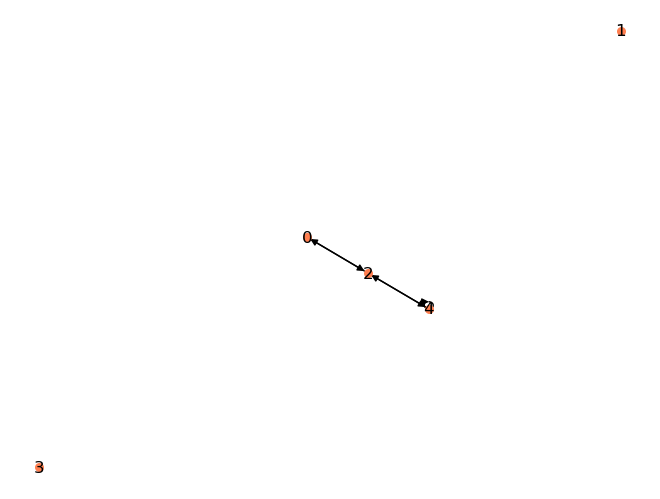

In [13]:
from torch_geometric.utils import to_networkx
sample_homogeneous = to_networkx(actors_net)


nx.draw(to_networkx(actors_net), node_size=30, node_color="coral", with_labels = True)

In [14]:
actors_net.x

tensor([[0.8050],
        [0.6915],
        [0.8267],
        [0.7270],
        [0.7371]])

In [15]:
sample_conv(actors_net.x, actors_net.edge_index)

tensor([[1.2164],
        [1.2943],
        [1.2943],
        [1.2441],
        [1.1689]], grad_fn=<AddBackward0>)

In [16]:
torch.vstack([
    torch.randint(0,50,(1,100)),
    torch.randint(0,2,(1,100))
])

tensor([[10, 18,  4,  9, 45, 12,  0,  7, 25, 28, 24,  7, 20, 20, 30, 36, 48, 40,
         43, 30, 14, 18,  9, 37,  9, 38, 42, 32, 15,  5, 12, 21, 21, 38, 42, 22,
         49, 40,  1, 26,  3,  1,  9, 31, 48, 16, 19, 35, 26, 49,  2, 49, 39, 22,
          1, 19, 26, 11,  2, 38, 12,  1, 23,  0, 42, 27, 31, 33, 46, 44, 24, 31,
         35,  3, 18, 47, 25,  1, 18, 15, 40, 31, 35, 14, 46, 28, 42, 28,  9, 45,
          5, 19,  8, 26, 38, 11,  2, 23, 17, 17],
        [ 1,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  0,  0,  1,  1,  1,  1,  0,
          0,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,
          0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  1,  1,  1,
          0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  0,  1,  1,
          0,  1,  0,  1,  1,  1,  1,  1,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
          0,  1,  1,  0,  1,  1,  0,  1,  0,  1]])

In [17]:
from torch_geometric.data import HeteroData

show_net = HeteroData()

show_net['actor'].x = torch.rand(50,5)
show_net['director'].x = torch.rand(2,5)

actor_actor = torch.randint(0,50,(2,100))
director_actor = torch.vstack([
    torch.randint(0,50,(1,75)),
    torch.randint(0,2,(1,75))
])

show_net['actor', 'interacts', 'actor'].edge_index = actor_actor
show_net['director', 'interacts', 'actor'].edge_index = director_actor

# data['paper', 'cites', 'paper'].edge_attr = ... # [num_edges_cites, num_features_cites]
# data['author', 'writes', 'paper'].edge_attr = ... # [num_edges_writes, num_features_writes]
# data['author', 'affiliated_with', 'institution'].edge_attr = ... # [num_edges_affiliated, num_features_affiliated]
# data['paper', 'has_topic', 'field_of_study'].edge_attr = ... # [num_edges_topic, num_features_topic]

In [18]:
from torch_geometric.datasets import IMDB

In [19]:
dataset = IMDB(root="/tmp/IMDB")

Extracting /tmp/IMDB/raw/IMDB_processed.zip
Processing...
Done!


In [20]:
dataset[0]

HeteroData(
  movie={
    x=[4278, 3066],
    y=[4278],
    train_mask=[4278],
    val_mask=[4278],
    test_mask=[4278]
  },
  director={ x=[2081, 3066] },
  actor={ x=[5257, 3066] },
  (movie, to, director)={ edge_index=[2, 4278] },
  (movie, to, actor)={ edge_index=[2, 12828] },
  (director, to, movie)={ edge_index=[2, 4278] },
  (actor, to, movie)={ edge_index=[2, 12828] }
)

In [21]:
dataset[0]['movie','to','director']

{'edge_index': tensor([[   0,    1,    2,  ..., 4275, 4276, 4277],
        [ 789,  680, 1757,  ..., 1781,  166,  399]])}

In [16]:
mask = dataset[0]['movie']['train_mask']

In [136]:
mask.shape

torch.Size([4278])

In [140]:
dataset[0]['movie'].x.shape

torch.Size([4278, 3066])

In [139]:
dataset[0]['movie'].x[mask].shape

torch.Size([400, 3066])

In [127]:
from torch_geometric.typing import Adj, OptPairTensor, Size, SparseTensor


In [130]:
Adj

typing.Union[torch.Tensor, torch_sparse.tensor.SparseTensor]

In [75]:
nx.draw(to_networkx(data), node_size=30, node_color="gray")

TypeError: 'HeteroData' object is not callable

In [2]:
streetview_graph_file = os.path.join('data','nyc','photos','streetview','manhattan_metadata_links.tsv')
streetview_graph = pd.read_csv(streetview_graph_file, sep="\t", header=None)

FileNotFoundError: [Errno 2] No such file or directory: 'data/nyc/photos/streetview/manhattan_metadata_links.tsv'

In [3]:
source = streetview_graph.iloc[:,0]
destin = streetview_graph.iloc[:,1]

In [4]:
all_terms = pd.concat([source, destin])

In [5]:
total_nodes = len(all_terms.unique())
total_nodes

55760

In [6]:
node_mapping = {}
for (index, value) in enumerate(all_terms.unique()):
    node_mapping[value] = index

In [7]:
def map_nodes(x):
    return x.apply(lambda i: node_mapping[i])

In [8]:
source_encoded = map_nodes(source)
destin_encoded = map_nodes(destin)

In [9]:
source_encoded

0             0
1             0
2             1
3             1
4             1
          ...  
115599    55757
115600    55758
115601    55758
115602    55759
115603    55759
Name: 0, Length: 115604, dtype: int64

In [10]:
photos_id_file = os.path.join('data','nyc','photos','processed','pano_ids.txt')
photos_ids = np.loadtxt(photos_id_file, dtype=str)
photos_ids

array(['3JdO3uGIWfLSImQMdtCCCA', 'RAFkfers_AmgCZChVfO3FQ',
       'oJxL7nOkGpwiKCl6rCTuTw', ..., 'q04-WzAcGr7qQ-rG_zO_cA',
       'nDSZGT9Y-VjVZcC4KH7x9Q', 'cFEBFJXqrD2NR-0v3zoXgA'], dtype='<U22')

In [11]:
photos_matrix_file = os.path.join('data','nyc','photos','processed','ResNet')
photos_matrix = torch.load(photos_matrix_file)
photos_matrix

tensor([[-0.8140, -0.1031, -0.5150,  ..., -0.3733,  0.7945,  0.7549],
        [-0.8714, -0.2139, -0.4887,  ..., -0.4787,  0.8860,  0.7696],
        [-0.8302, -0.1603, -0.4612,  ..., -0.3989,  0.7977,  0.7849],
        ...,
        [-0.8216, -0.1132, -0.4442,  ..., -0.5272,  0.7926,  0.8943],
        [-0.8641, -0.1310, -0.4554,  ..., -0.4449,  0.8024,  0.7701],
        [-0.8631, -0.2308, -0.4532,  ..., -0.4594,  0.7909,  0.8491]])

In [12]:
type(photos_matrix)

torch.Tensor

In [13]:
photos_ids_encoded = np.array([ node_mapping[i] for i in photos_ids])
photos_ids_encoded

array([13800, 25319, 35435, ..., 45894, 29141, 50295])

In [14]:
encoded_sortidx = np.argsort(photos_ids_encoded)

In [15]:
encoded_photos_matrix = photos_matrix[encoded_sortidx]
encoded_photos_matrix

tensor([[-0.9107, -0.1331, -0.4878,  ..., -0.5632,  0.7573,  0.8421],
        [-0.8568, -0.0942, -0.5094,  ..., -0.4246,  0.8656,  0.6877],
        [-0.8932, -0.0838, -0.4080,  ..., -0.5061,  0.6144,  0.8275],
        ...,
        [-0.8782, -0.1524, -0.4010,  ..., -0.4682,  0.8618,  0.8630],
        [-0.9220, -0.1029, -0.4641,  ..., -0.4840,  0.7681,  0.8684],
        [-0.8535, -0.1804, -0.5038,  ..., -0.4351,  0.7124,  0.8955]])

In [97]:
encoded_photos_matrix.shape

torch.Size([55760, 1000])

In [98]:
node_list = encoded_photos_matrix # this is temporary
feature_size = node_list.shape[-1]

edge_list = torch.tensor(np.array([
    np.array(source_encoded),
    np.array(destin_encoded)
]))

data = Data(x=node_list, edge_index=edge_list)

In [99]:
data.num_features

1000

In [100]:
data.num_nodes

55760

In [101]:
data.num_edges

115604

In [102]:
data.has_isolated_nodes()

False

In [103]:
data.has_self_loops()

False

In [104]:
data.is_directed()

False

In [96]:
building_info = pd.read_json(os.path.join('..','train.json'))
building_info

,id,bbl,bin,daily_electric,daily_gas,heightroof,cnstrct_yr,groundelev,month,year,month_days,TMAX,TMIN,PRCP,floorarea,streetview_panos
0,6894297,1007640007,1013712,2721.474194,8238.145161,73.151163,1930,22,1,2020,31,7.354839,0.629032,1.583871,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
1,6894297,1007640007,1013712,2704.079310,8239.224138,73.151163,1930,22,2,2020,29,8.055172,1.017241,2.231034,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
2,6894297,1007640007,1013712,2791.329032,7056.619355,73.151163,1930,22,3,2020,31,12.841935,4.922581,3.100000,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
3,6894297,1007640007,1013712,2828.940000,4662.300000,73.151163,1930,22,4,2020,30,14.273333,6.103333,3.806667,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
4,6894297,1007640007,1013712,2517.912903,2591.158065,73.151163,1930,22,5,2020,31,20.661290,10.770968,1.354839,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112264,2817653,3065870017,3133770,3472.206452,4832.258065,67.180000,1941,29,8,2020,31,28.367742,20.806452,2.309677,1817.389245,[]
112265,2817653,3065870017,3133770,2456.166667,6290.000000,67.180000,1941,29,9,2020,30,24.360000,16.050000,2.420000,1817.389245,[]
112266,2817653,3065870017,3133770,1827.170968,11645.161290,67.180000,1941,29,10,2020,31,18.261290,10.832258,4.080645,1817.389245,[]
112267,2817653,3065870017,3133770,1852.463333,22630.000000,67.180000,1941,29,11,2020,30,15.200000,5.790000,3.933333,1817.389245,[]


In [27]:
node_mapping

{'vObwnlfcaL_HIexFPZA44w': 0,
 'JJCoKvIHdfhoAHqNT41fIg': 1,
 'TXQPP3FKPP6z8dyEAr46EA': 2,
 'upDQiE-YgFVE8TQA64CI3A': 3,
 'g4nKnSFs-a5Ra5qZuqj6jA': 4,
 'pG1yM113IfURjghonkxXqQ': 5,
 'DYMJtCo4SavL8jamHE00hw': 6,
 'sLMbGwwtg-bZFMVeJLaxFg': 7,
 'ww02AvOxAWTm1hWSCEgDFQ': 8,
 '-L3SZAalq7amDITQ8tlNGw': 9,
 'xnM6e33M6HBt512Ch46mqg': 10,
 'ZFPNXtcV9oQt_8pWnRQW8A': 11,
 'RD5tGLURYtJqSejNPnuylQ': 12,
 'K0hCgzGCdLOnATt93LdMEg': 13,
 'HAJ0I06-4YtRxXOZ1X20IQ': 14,
 'ZfDL_ZTQByfSKACYl5-Lyw': 15,
 'dX_mrNY6WalEWBt2--hxzw': 16,
 'cMpO8X-J8uxgjyoVDtthBg': 17,
 'ANctp2zmBYG-pDbAwX_lDg': 18,
 'D2dwgbxpX57Qn6zZXf9FRA': 19,
 'YwUC7_njlhQxVowyE7wFHQ': 20,
 'Ggubsf2wayxFNzLp3Bav0g': 21,
 'AxOrvTqFIuyopOeRGOvv5w': 22,
 'w22rO8SVOMGz4HpsSB74ug': 23,
 '1Ty8rqHoUlJIpR3KrtHw6Q': 24,
 'lxAzk3uDwldpEwPey_klig': 25,
 'yEKF1l4i5f4w7Kv93zCvaQ': 26,
 '1Lktcz8s6i1FUzLCU0y-bA': 27,
 'eHjU990aBjLWpQiPjE1N2Q': 28,
 'EK8FRDRmCs5rmaBt88AsTw': 29,
 'Qi388ToIwLq4QdSJ51U8Cg': 30,
 'IpRnYVbxQR7ZAIFM8n_gyg': 31,
 'Q4WmXwNi5yFvcq2f

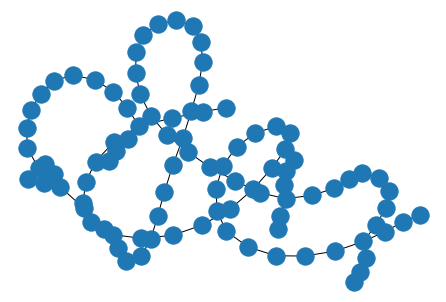

In [105]:
# getting a sample to test
sample_subgraph_nodes = building_info['streetview_panos'][1]

# mapping to subgraph encodings
sample_subgraph_encoding = torch.tensor([ node_mapping[i] for i in sample_subgraph_nodes ])
data_subgraph = data.subgraph(sample_subgraph_encoding)

# for visualization
g = pyg.utils.to_networkx(data_subgraph, to_undirected=True)
nx.draw(g)

In [106]:
sample_subgraph_encoding

tensor([  669,   764,   848,  1087,  2069,  2869,  3354,  3534,  3564,  3917,
         3920,  4867,  5673,  5785,  5918,  7094,  7552,  7625,  9646, 12496,
        12859, 13852, 14891, 14959, 15288, 15694, 16080, 16390, 16627, 16884,
        17254, 17886, 17918, 18321, 19049, 19728, 21166, 21793, 22230, 23368,
        23881, 24121, 24537, 26326, 26749, 27026, 27583, 28080, 28169, 29202,
        29930, 30633, 31039, 31042, 31107, 31292, 31885, 32645, 33018, 33242,
        34050, 34286, 34497, 35372, 35417, 38139, 38595, 38671, 38904, 39698,
        39943, 39979, 40384, 40766, 41049, 42374, 42855, 43261, 43289, 44421,
        44749, 44995, 46405, 47786, 50019, 50113, 50258, 52101, 52637, 53272,
        53791, 53833, 54310, 55282, 55382])

In [107]:
sample_subgraph_encoding

tensor([  669,   764,   848,  1087,  2069,  2869,  3354,  3534,  3564,  3917,
         3920,  4867,  5673,  5785,  5918,  7094,  7552,  7625,  9646, 12496,
        12859, 13852, 14891, 14959, 15288, 15694, 16080, 16390, 16627, 16884,
        17254, 17886, 17918, 18321, 19049, 19728, 21166, 21793, 22230, 23368,
        23881, 24121, 24537, 26326, 26749, 27026, 27583, 28080, 28169, 29202,
        29930, 30633, 31039, 31042, 31107, 31292, 31885, 32645, 33018, 33242,
        34050, 34286, 34497, 35372, 35417, 38139, 38595, 38671, 38904, 39698,
        39943, 39979, 40384, 40766, 41049, 42374, 42855, 43261, 43289, 44421,
        44749, 44995, 46405, 47786, 50019, 50113, 50258, 52101, 52637, 53272,
        53791, 53833, 54310, 55282, 55382])

In [31]:
node_list.shape

torch.Size([55760, 1000])

In [32]:
torch.zeros(1,feature_size).shape

torch.Size([1, 1000])

In [33]:
from torch_geometric.data.lightning_datamodule import LightningDataset

In [120]:
train_streetview = building_info[building_info['streetview_panos'].map(len) > 0]

In [121]:
train_nostreetview = building_info[building_info['streetview_panos'].map(len) == 0]

In [123]:
train_streetview

,id,bbl,bin,daily_electric,daily_gas,heightroof,cnstrct_yr,groundelev,month,year,month_days,TMAX,TMIN,PRCP,floorarea,streetview_panos
0,6894297,1007640007,1013712,2721.474194,8238.145161,73.151163,1930,22,1,2020,31,7.354839,0.629032,1.583871,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
1,6894297,1007640007,1013712,2704.079310,8239.224138,73.151163,1930,22,2,2020,29,8.055172,1.017241,2.231034,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
2,6894297,1007640007,1013712,2791.329032,7056.619355,73.151163,1930,22,3,2020,31,12.841935,4.922581,3.100000,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
3,6894297,1007640007,1013712,2828.940000,4662.300000,73.151163,1930,22,4,2020,30,14.273333,6.103333,3.806667,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
4,6894297,1007640007,1013712,2517.912903,2591.158065,73.151163,1930,22,5,2020,31,20.661290,10.770968,1.354839,26869.289838,"[X1V_iEFj-eWEtnGyZEhSTA, FVQx_XsqPlaH0lViJ7qln..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112157,3544032,1008380038,1080727,6212.770968,5989.077419,260.000000,2011,56,8,2020,31,28.758065,21.093548,4.125806,29520.087384,"[aywTv_e3Ob9fuTii871ADw, i0fvvgjQV-0ZkDGhS1b_F..."
112158,3544032,1008380038,1080727,4555.023333,4974.236667,260.000000,2011,56,9,2020,30,24.160000,16.690000,3.336667,29520.087384,"[aywTv_e3Ob9fuTii871ADw, i0fvvgjQV-0ZkDGhS1b_F..."
112159,3544032,1008380038,1080727,3694.870968,7627.622581,260.000000,2011,56,10,2020,31,17.725806,11.032258,4.138710,29520.087384,"[aywTv_e3Ob9fuTii871ADw, i0fvvgjQV-0ZkDGhS1b_F..."
112160,3544032,1008380038,1080727,3685.340000,7303.073333,260.000000,2011,56,11,2020,30,15.460000,7.820000,3.380000,29520.087384,"[aywTv_e3Ob9fuTii871ADw, i0fvvgjQV-0ZkDGhS1b_F..."


In [75]:
train_streetview = 

Data(x=[1, 1000], edge_index=[0])

In [124]:
subgraph_list = []
for index, pano_list in enumerate(train_streetview['streetview_panos']):
    if len(pano_list) > 0:
        sample_subgraph_encoding = torch.tensor([ node_mapping[i] for i in pano_list ])
        subgraph_list.append(data.subgraph(sample_subgraph_encoding))
    else:
        subgraph_list.append(Data(torch.zeros(1,feature_size), edge_list=[]))

In [125]:
subgraph_list[:3]

[Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190])]

In [126]:
from torch_geometric.data import Batch, DenseDataLoader

In [127]:
DenseDataLoader

<function torch_geometric.loader.dense_data_loader.DenseDataLoader(*args, **kwds)>

In [128]:
batched = DenseDataLoader(subgraph_list, batch_size=16)

/Users/tomdougherty/opt/anaconda3/envs/dbr/lib/python3.6/site-packages/torch_geometric/deprecation.py:13: UserWarning: 'data.DenseDataLoader' is deprecated, use 'loader.DenseDataLoader' instead
  warnings.warn(out)


In [132]:
batched.dataset

[Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[95, 1000], edge_index=[2, 190]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2, 126]),
 Data(x=[63, 1000], edge_index=[2,

In [130]:
next(iter(batched))

RuntimeError: stack expects each tensor to be equal size, but got [2, 190] at entry 0 and [2, 126] at entry 12

In [36]:
s = torch.cat([torch.rand(10),subgraph_list[0].x.mean(axis=0)]).reshape(1,-1)

In [37]:
subgraph_loader = DataLoader(subgraph_list, batch_size=32)

In [38]:
subgraph_loader

In [44]:
 batch = next(iter(subgraph_loader))

TypeError: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'torch_geometric.data.data.Data'>

In [ ]:
input_size = s.shape[-1]
neuralnet = nn.Sequential(
    nn.Linear(input_size, 200),
    nn.ReLU(),
    nn.Linear(200,200),
    nn.ReLU(),
    nn.Linear(200,200),
    nn.ReLU(),
    nn.Linear(200,2)
)

In [ ]:
neuralnet(s)

In [ ]:
import torch.nn as nn

In [ ]:
# from torch_geometric.datasets import TUDataset
# dataset = TUDataset(root="./tmp", name="PROTEINS")

In [ ]:
# dataset[1].y

In [ ]:
# from torch.nn import Linear, ReLU
# from torch_geometric.nn import Sequential, GCNConv

# model = Sequential('x, edge_index', [
#     (GCNConv(dataset.num_features, 64), 'x, edge_index -> x'),
#     ReLU(inplace=True),
#     (GCNConv(64, 64), 'x, edge_index -> x'),
#     ReLU(inplace=True),
#     Linear(64, 1),
# ])

In [ ]:
from torch_scatter import scatter_mean
from torch_geometric.datasets import TUDataset
from torch_geometric.loader import DataLoader

dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES', use_node_attr=True)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

In [ ]:
dataset[1].y

In [ ]:
sample_loader = next(iter(loader))

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GCNConv

class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = GCNConv(dataset.num_node_features, 16)
        self.conv2 = GCNConv(16, dataset.num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, training=self.training)
        x = self.conv2(x, edge_index)

        return F.log_softmax(x, dim=1)

In [ ]:
model = GCN()

In [45]:
import yaml

os.chdir('src')
with open("training_settings.yml", 'r') as f:
    settings = yaml.safe_load(f)

In [47]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder

import torch
from torch.utils.data import Dataset, IterableDataset
from torch_geometric.data import Data
from torch_geometric.data import Dataset as GeometricDataset
from torch_geometric.loader import DataLoader
from torch_geometric.data.lightning_datamodule import LightningDataset

from ml.utils.graph_construction import construct_graph

class GraphCollector(GeometricDataset, IterableDataset):
    def __init__(self, json_file: str, photos_links:str, photos_ids:str, photos_matrix:str, transform=None, pre_transform=None, **kwargs):
        super().__init__(None, transform, pre_transform)

        building_info = pd.read_json(json_file)
        self.encoder, self.streetview_graph = construct_graph(photos_links, photos_ids, photos_matrix)

        # Want to keep this around because I want the subgraph construction to be dynamic
        subgraph_list = np.empty(len(building_info.streetview_panos), dtype=object)
        for index, pano_list in enumerate(building_info.streetview_panos):
            if len(pano_list) > 0:
                sample_subgraph_encoding = torch.tensor([ self.encoder[i] for i in pano_list ])
                subgraph_list[index] = self.streetview_graph.subgraph(sample_subgraph_encoding)
            else:
                subgraph_list[index] = Data(torch.zeros(1,self.streetview_graph.num_features))

        self.subgraph_list = subgraph_list

    def len(self):
        return len(self.subgraph_list)

    def get(self, idx):
        return self.subgraph_list[idx]

    @property
    def _full_graph(self):
        return self.streetview_graph

class DataCollector(IterableDataset):
    def __init__(self, json_file:str, transform=None, **kwargs):
        """
        Args:
            json_file (string): Path to the file with all the data we want
            transform (callable, optional): Optional transform to be applied on a sample.
        """
        building_info = pd.read_json(json_file)

        # might want to change this later to a more generic integer based index
        self.y = torch.FloatTensor(np.array(building_info.loc[:,["daily_electric", "daily_gas"]]))

        # These are going to be all numeric terms which I can cast into a FloatTensor
        self.x = torch.FloatTensor(np.array(building_info.loc[:, [
            "heightroof",
            "cnstrct_yr",
            "groundelev",
            "TMAX",
            "TMIN",
            "PRCP",
            "floorarea"
            ]]
        ))

    def __iter__(self):
        return iter(zip(self.x, self.y))

    def __len__(self):
        return self.x.shape[0]

    def setup(self):
        return

    def prepare_data(self):
        return

    def __getitem__(self, idx):
        return (
            self.x[idx],
            self.y[idx]
        )

In [135]:
settings['data_locations']

{'json_file': '../train.json',
 'photos_ids': '../data/nyc/photos/processed/pano_ids.txt',
 'photos_matrix': '../data/nyc/photos/processed/ResNet',
 'photos_links': '../data/nyc/photos/streetview/manhattan_metadata_links.tsv'}

In [133]:
class GraphCollectorTee(GeometricDataset):
    def __init__(self, json_file: str, photos_links:str, photos_ids:str, photos_matrix:str, transform=None, pre_transform=None, **kwargs):
        super().__init__(None, transform, pre_transform)

        building_info = pd.read_json(json_file)
        self.encoder, self.streetview_graph = construct_graph(photos_links, photos_ids, photos_matrix)

        # Want to keep this around because I want the subgraph construction to be dynamic
        subgraph_list = np.empty(len(building_info.streetview_panos), dtype=object)
        for index, pano_list in enumerate(building_info.streetview_panos):
            if len(pano_list) > 0:
                sample_subgraph_encoding = torch.tensor([ self.encoder[i] for i in pano_list ])
                subgraph_list[index] = self.streetview_graph.subgraph(sample_subgraph_encoding)
            else:
                subgraph_list[index] = Data(torch.zeros(1,self.streetview_graph.num_features))

        self.subgraph_list = subgraph_list
        
        # might want to change this later to a more generic integer based index
        self.y = torch.FloatTensor(np.array(building_info.loc[:,["daily_electric", "daily_gas"]]))

        # These are going to be all numeric terms which I can cast into a FloatTensor
        self.x = torch.FloatTensor(np.array(building_info.loc[:, [
            "heightroof",
            "cnstrct_yr",
            "groundelev",
            "TMAX",
            "TMIN",
            "PRCP",
            "floorarea"
            ]]
        ))

    def len(self):
        return len(self.subgraph_list)

    def get(self, idx):
        return (
            self.x[idx],
            self.subgraph_list[idx],
            self.y[idx]
        )

    @property
    def _full_graph(self):
        return self.streetview_graph

In [134]:
custom_graph = GraphCollectorTee(**settings['data_locations'])

In [54]:
custom_graph[:10].subgraph_list

array([Data(x=[95, 1000], edge_index=[2, 190]),
       Data(x=[95, 1000], edge_index=[2, 190]),
       Data(x=[95, 1000], edge_index=[2, 190]), ..., Data(x=[1, 1000]),
       Data(x=[1, 1000]), Data(x=[1, 1000])], dtype=object)

In [ ]:
print(issubclass(DataCollector, IterableDataset))

In [ ]:
custom_graph[10]

In [ ]:
from torch.utils.data import Dataset, ChainDataset

In [ ]:
issubclass(Dataset, torch.utils.data.IterableDataset)

In [ ]:
data_module = DataCollector(**settings['data_locations'])
graph_module = GraphCollector(**settings['data_locations'])

In [ ]:
chained = ChainDataset([data_module, graph_module])
chained

In [ ]:
len(chained.datasets[1])

In [ ]:
len(chained)

In [ ]:
# might want to change this later to a more generic integer based index
y = torch.FloatTensor(np.array(building_info.loc[:,["daily_electric", "daily_gas"]]))

# These are going to be all numeric terms which I can cast into a FloatTensor
x = torch.FloatTensor(np.array(building_info.loc[:, [
    "heightroof",
    "cnstrct_yr",
    "groundelev",
    "TMAX",
    "TMIN",
    "PRCP",
    "floorarea"
    ]]))

In [ ]:
mm = iter(zip(x, y))

In [ ]:
next(mm)

In [ ]:
tmod = custom_graph

train_size = int(0.80 * len(tmod))
val_size = int((len(tmod) - train_size))

train_set, val_set = random_split(custom_graph, (train_size, val_size))
len(train_set)

In [ ]:
graph_module[10]

In [ ]:
len(graph_module)

In [ ]:
len(data_module)

In [ ]:
type(data_module)

In [ ]:
issubclass(type(data_module), torch.utils.data.IterableDataset)

In [ ]:
concat_data = ChainDataset([data_module, graph_module])
concat_data

In [ ]:
cdata_iter = iter(graph_module)

In [ ]:
dir(cdata_iter)

In [ ]:
graph_module[1]

In [ ]:
for batch in loader:
    print(batch)

In [ ]:
sample_thing = [(torch.rand(10), subgraph_list[i], torch.rand(2)) for i in range(10)]
list(zip(*sample_thing[:3]))

In [ ]:
x, subg, y = zip(*sample_thing)

In [ ]:
list(zip(*[(1, 2), (3, 4), (5, 6)]))

In [ ]:
type(t)

In [ ]:
os.chdir('src')
from src.ml.data_collector import DataCollector

In [ ]:
import yaml
with open("training_settings.yml", 'r') as f:
    settings = yaml.safe_load(f)

In [ ]:
settings

In [ ]:
data_module = DataCollector(**settings['data_locations'])

In [ ]:
type(data_module)

In [ ]:
concat_data = torch.utils.data.ConcatDataset([data_module, t], axis=1)

In [ ]:
from torch.utils.data import random_split

train_size = int(0.80 * len(data_module))
val_size = int((len(data_module) - train_size))

train_set, val_set = random_split(data_module, (train_size, val_size))

In [ ]:
training_iter = iter(train_set)

In [ ]:
next(training_iter)

In [ ]:
from torch_geometric.data.lightning_datamodule import LightningDataset

In [ ]:
LightningDataset(t)

In [ ]:
subgraph_list[4]

In [ ]:
torch.cat([torch.zeros(10), subgraph_list[0].x.mean(axis=0)])

In [ ]:
type(torch.zeros(10, dtype=torch.float64))

In [ ]:
Data(torch.zeros(1,feature_size)).x.shape

In [ ]:
np.array(subgraph_list, dtype=object)

So if we don't have any streetview images, we don't want to trigger any of the activations, therefore going to just pass through zeros^

In [ ]:
sample_sub = subgraph_list[101]
print(sample_sub)
print()

print("The subgraph nodal values")
print(sample_sub.x)

In [ ]:
len(subgraph_list) # this should be equivalent to the number of streetview panos we have

In [ ]:
# Want to implement a new data loading class so that the batches of streetview images can be recorded around each building

class StreetviewDataset(InMemoryDataset):
    def __init__(self, root, transform=None, pre_transform=None, pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        self.data, self.slices = torch.load(self.processed_paths[0])

    @property
    def raw_file_names(self):
        return ['some_file_1', 'some_file_2', ...]

    @property
    def processed_file_names(self):
        return ['data.pt']

    def download(self):
        # Download to `self.raw_dir`.
        download_url(url, self.raw_dir)
        ...

    def process(self):
        # Read data into huge `Data` list.
        data_list = [...]

        if self.pre_filter is not None:
            data_list = [data for data in data_list if self.pre_filter(data)]

        if self.pre_transform is not None:
            data_list = [self.pre_transform(data) for data in data_list]

        data, slices = self.collate(data_list)
        torch.save((data, slices), self.processed_paths[0])